# Zonal Mean Temperature

Calculating the zonal mean of a quantity

In [8]:
%matplotlib inline

from cosima_cookbook import get_nc_variable, expts
from cosima_cookbook import memory

import matplotlib.pyplot as plt

In [3]:
@memory.cache
def calc_zonal_mean_temp(expt):
    print('Calculating {} zonal_mean_temp'.format(expt))
    
    if expt == 'mom01v5/KDS75':
        ncfile = 'ocean_month.nc'
    else:
        ncfile = 'ocean.nc'
        
    zonal_temp = get_nc_variable(expt, ncfile, 'temp',
                                 chunks={'st_ocean': None},
                                 n=25)
    
    zonal_mean_temp = zonal_temp.mean('xt_ocean').mean('time')
    zonal_mean_temp.load()
    
    return zonal_mean_temp

In [4]:
def plot_zonal_mean_temp(expt):
    zonal_mean_temp = calc_zonal_mean_temp(expt)
    
    zonal_mean_temp.plot()
    plt.gca().invert_yaxis()
    plt.title('{}: Zonal Mean Temp'.format(expt))

Calculating mom01v5/GFDL50 zonal_mean_temp
Calculating mom01v5/KDS75 zonal_mean_temp
Calculating mom01v5/KDS75_PI zonal_mean_temp


IndexError: index out of range

/short/v45/jm0634/conda/envs/cosima/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


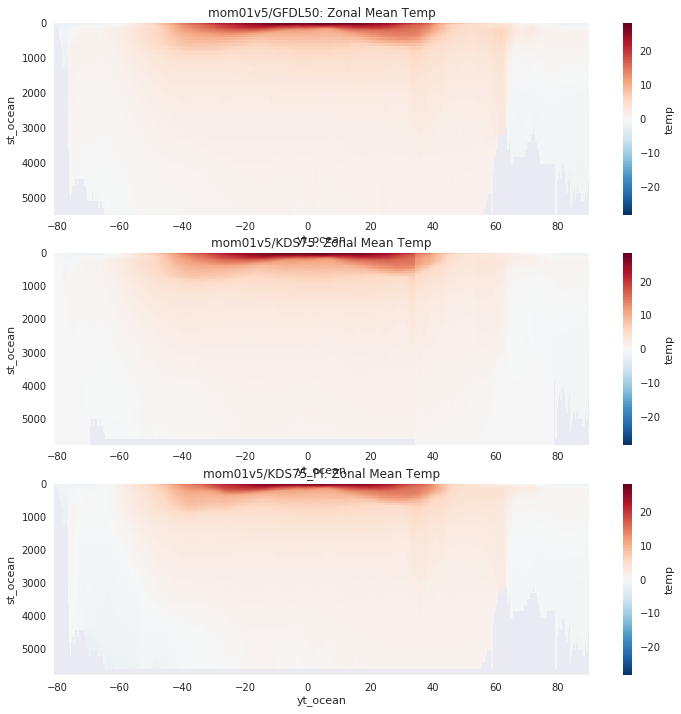

In [23]:
plt.figure(figsize=(12,12)) 
gs = gridspec.GridSpec(3, 1)
for i, expt in enumerate(expts): 

    plt.subplot(gs[i])
    
    plot_zonal_mean_temp(expt)